# Graded Challenge 2

Annesa Fadhila Damayanti

Batch 11

## Bigdata Query from Google Cloud

SELECT age, workclass, education, education_num, 
marital_status, occupation, relationship, race, sex, 
capital_gain, capital_loss, hours_per_week, native_country, income_bracket

FROM `personal-nesa.ml_datasets.census_adult_income_copy`

WHERE NOT workclass = '?' AND hours_per_week < 100

LIMIT 21967;

## Objective

Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset yang sudah kalian simpan.

## Conceptual Problems

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
2. Apakah yang dimaksud dengan Support Vector pada SVM?
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

----
Answer

1. Logistic Regression adalah regressi yang memprediksi variabel terikay yang berskala dikotomi. skala dikotomi adalah skala data nominal dengan dua ketegori, misalnya "Ya dan Tidak, Baik dan Buruk, atau Tinggi dan Rendah". coefficient pada Logistic Regression disebut juga dengan Odds Ratio. Odds Ratio sering dinyatakan sebagai probabilitas. probabilitas dapat digunakan untuk mengestimasi kemungkinan terjadinya suatu variabel.

2. dalam SVM objek yang paling dekat dengan hyperplane disebut support vector. support vector paling sulit diklasifikasikan dikarenakan posisi yang hampir tumpang tindih dengan kelas lain. support vector memiliki sifat yang kritis, support vector dihitung untuk menemukan hyperplane yang paling optimal.

3. fungsi kernel adalah memudahkan pengklasifikasi data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik. kernel linear digunakan untuk klasifikasi data linear. kernel linear cocok ketika terdapat banyak fitur dikarenakan parameter ke ruang dimensi yang lebih tinggi tidak benar-benar meningkatkan kinerja.

# Import Libraries

In [356]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Data Loading

In [303]:
df = pd.read_csv(r'C:\Users\annes\OneDrive\Documents\Hacktive8\assigments\Graded_Challenge\p1---ftds011---g2-nesafadhila\h8dsft_P1G2_Annesa_Fadhila_Damayanti.csv.csv')

In [304]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [305]:
df.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
21962,56,Private,9th,5,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
21963,40,Private,9th,5,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
21964,25,Self-emp-not-inc,9th,5,Never-married,Craft-repair,Not-in-family,White,Male,0,0,15,United-States,<=50K
21965,33,Private,9th,5,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,35,United-States,<=50K
21966,50,Private,9th,5,Divorced,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21967 entries, 0 to 21966
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21967 non-null  int64 
 1   workclass       21967 non-null  object
 2   education       21967 non-null  object
 3   education_num   21967 non-null  int64 
 4   marital_status  21967 non-null  object
 5   occupation      21967 non-null  object
 6   relationship    21967 non-null  object
 7   race            21967 non-null  object
 8   sex             21967 non-null  object
 9   capital_gain    21967 non-null  int64 
 10  capital_loss    21967 non-null  int64 
 11  hours_per_week  21967 non-null  int64 
 12  native_country  21967 non-null  object
 13  income_bracket  21967 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


There is no Missing Values in dataset df.

In [307]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,21967.000000,21967.000000,21967.000000,21967.000000,21967.000000
mean,38.862339,10.091455,1267.779169,94.853963,41.030409
std,12.985655,2.550012,8186.229692,417.242845,12.246861
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


pada tabel diatas dapat dilihat bahwa rata-rata pekerja berumur 38 tahun dengan rata-rata bekerja 41 jam/minggu

# Exploratory Data Analysis (EDA)

In [308]:
dfc = df.copy()

In [309]:
df['age'].unique()

array([39, 72, 45, 31, 55, 30, 46, 28, 37, 40, 27, 70, 77, 38, 41, 52, 36,
       58, 48, 22, 29, 26, 25, 24, 32, 81, 56, 59, 42, 47, 60, 43, 54, 49,
       44, 35, 53, 61, 21, 33, 23, 50, 34, 64, 19, 69, 71, 51, 63, 20, 67,
       57, 62, 66, 18, 73, 90, 65, 76, 17, 68, 83, 74, 75, 79, 78, 80, 82,
       84, 85, 88], dtype=int64)

In [310]:
df['workclass'].unique()

array([' Private', ' Self-emp-inc', ' Local-gov', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [311]:
df['education'].unique()

array([' 9th', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' HS-grad', ' Masters', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' Preschool', ' Assoc-acdm', ' Prof-school',
       ' Some-college'], dtype=object)

In [312]:
df['marital_status'].unique()

array([' Married-civ-spouse', ' Married-AF-spouse', ' Never-married',
       ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed'],
      dtype=object)

In [313]:
df['occupation'].unique()

array([' Other-service', ' Exec-managerial', ' Machine-op-inspct',
       ' Tech-support', ' Adm-clerical', ' Farming-fishing',
       ' Priv-house-serv', ' Sales', ' Protective-serv',
       ' Transport-moving', ' Handlers-cleaners', ' Craft-repair',
       ' Prof-specialty', ' ?', ' Armed-Forces'], dtype=object)

In [314]:
df['relationship'].unique()

array([' Wife', ' Husband', ' Own-child', ' Unmarried', ' Not-in-family'],
      dtype=object)

In [315]:
df['race'].unique()

array([' Black', ' Asian-Pac-Islander', ' White', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [316]:
df['capital_gain'].unique()

array([ 3411,     0,  2653,  2635,  2936,  3908,  5178,  2829,  4508,
        3103,  5013, 15024,  7688, 20051, 22040,  4064,  2414,  3471,
        4386,  7298,  3464,  3942,  3137, 99999,  2407,  2885, 10566,
        9386,  1409,  3781,  1424,  2228,  2580,  2105,  6418,  1797,
        2961,  6767,  2290,  3432,  3818, 10605,  3456,  6514, 41310,
        5556,  1455,  1173,  4931,  1055,   594,  2907,  2176, 14344,
        6849,  4101,  2597, 10520,  8614, 34095,  2174,  4650,  1831,
        4416, 14084,  3325,  3674,   114,  2354,  1506,  2329, 27828,
        6497,  2202,  4787,  2463,  3418,  5060,   914,  7430,  1471,
        2964,  2977,  4865,  1151,  2538,  3887,  5455,  5721,  7443,
        2036,  1848,  9562,  2346,  4934,  2387, 25236, 15020,  7896,
        4687,  3273,  6723,  6360,  2062], dtype=int64)

In [317]:
df['capital_loss'].unique()

array([   0, 1977, 2129, 1573, 1740, 2377, 1887, 2179, 2415, 1579, 1848,
       2057, 1628, 1902, 1485, 2267, 1258, 1672, 1651, 2051, 2042, 2002,
       1735, 2603, 1411, 2352, 2174, 2149, 1825, 2457,  419, 2467, 2392,
       1648, 2246, 1539, 1844, 1719, 1602, 1762, 1721, 1138, 1669, 1590,
       1504, 1594, 1876, 2258, 2001, 1408, 1980, 1974, 1340, 2231, 1092,
       2339, 1564, 1726, 2205, 1380, 1617, 3900,  625, 2559, 3770, 2238,
        880,  974,  653, 2206,  323, 2754, 1741,  213, 2547, 1755, 2201,
       2472, 3004, 2080, 1816], dtype=int64)

In [318]:
df['hours_per_week'].unique()

array([34, 48, 40, 23, 50, 37, 42, 10, 24, 70,  8, 32, 35, 28, 30, 36, 25,
       43,  6,  5, 60, 20, 14, 33, 38, 45, 72, 15, 99, 55, 75, 53, 54, 16,
       56, 21, 22, 52,  2, 12, 18, 17, 46, 27,  7, 19, 26,  4, 65, 44, 80,
       90, 13, 47, 39,  1, 84, 49, 58, 41, 59, 88, 98, 85, 96, 67, 51, 31,
       91, 63, 64, 78, 66,  3, 68, 89, 94, 57, 97, 62, 73, 11, 76, 61, 77,
       29,  9, 86, 92, 74, 95, 81], dtype=int64)

In [319]:
df['native_country'].unique()

array([' United-States', ' Portugal', ' Yugoslavia', ' Haiti',
       ' Dominican-Republic', ' Mexico', ' Guatemala', ' ?', ' Japan',
       ' Hong', ' Philippines', ' El-Salvador', ' Vietnam', ' Italy',
       ' Laos', ' Canada', ' Puerto-Rico', ' Jamaica', ' South',
       ' Trinadad&Tobago', ' Greece', ' Peru', ' Iran', ' Germany',
       ' Columbia', ' Scotland', ' China', ' Nicaragua', ' Cuba',
       ' England', ' Poland', ' Outlying-US(Guam-USVI-etc)', ' Taiwan',
       ' Hungary', ' India', ' Ecuador', ' Thailand', ' Cambodia',
       ' Honduras', ' France', ' Ireland'], dtype=object)

<AxesSubplot:xlabel='sex', ylabel='count'>

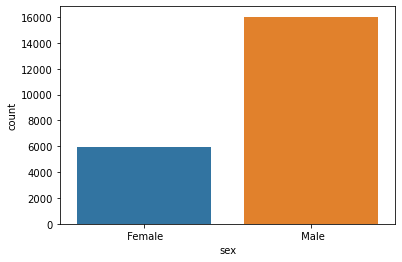

In [320]:
sns.countplot(data=df,x='sex')

from this plot, we can see that worker male is more than worker female.
mungkin banyak perempuan yang menjadi ibu rumah tangga saat sudah menikah, dan menjadikan laki-laki kepala rumah tangga yang wajib untuk bekerja untuk memenuhi kebutuhan keluarga.

<AxesSubplot:xlabel='relationship', ylabel='count'>

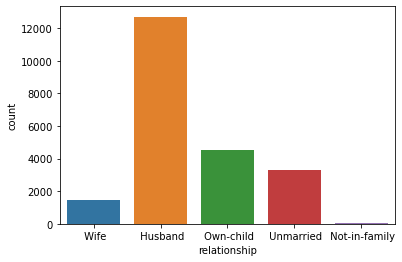

In [321]:
sns.countplot(data=df,x='relationship')

seperti yang saya asumsikan bahwa banyak laki-laki yang menikah yang bekerja. 

Sebelum di Encode


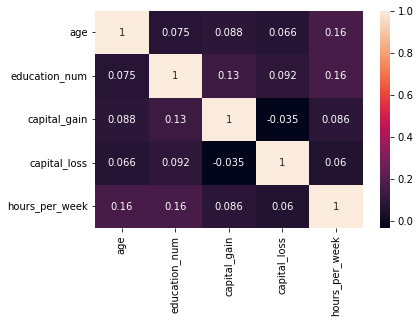

In [322]:
sns.heatmap(df.corr(),annot=True)
print('Sebelum di Encode')

sebelum di encode, terlihat bahwa capital gain berpengaruh dengan hour per week dan juga capital loss berpengaruh dengan education num

In [323]:
## get data inference
df_inf = df.sample(20, random_state=400)

In [324]:
df_real = df.drop(df_inf.index)
df_real.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [325]:
encode = OrdinalEncoder()
df_encode = encode.fit_transform(df_real)

In [326]:
encode_df = pd.DataFrame(df_encode)
encode_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,22.0,3.0,6.0,4.0,2.0,8.0,4.0,2.0,0.0,46.0,0.0,33.0,38.0,0.0
1,55.0,3.0,6.0,4.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,47.0,38.0,1.0
2,28.0,3.0,6.0,4.0,2.0,7.0,4.0,4.0,0.0,0.0,0.0,39.0,38.0,1.0
3,14.0,3.0,6.0,4.0,2.0,4.0,4.0,4.0,0.0,0.0,0.0,39.0,38.0,0.0
4,38.0,3.0,6.0,4.0,2.0,13.0,4.0,4.0,0.0,0.0,0.0,22.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,39.0,3.0,6.0,4.0,0.0,3.0,1.0,4.0,1.0,0.0,0.0,39.0,38.0,0.0
21943,23.0,3.0,6.0,4.0,0.0,8.0,1.0,4.0,0.0,0.0,0.0,39.0,38.0,0.0
21944,8.0,5.0,6.0,4.0,4.0,3.0,1.0,4.0,1.0,0.0,0.0,14.0,38.0,0.0
21945,16.0,3.0,6.0,4.0,0.0,7.0,1.0,4.0,1.0,0.0,0.0,34.0,38.0,0.0


Sesudah di Encode


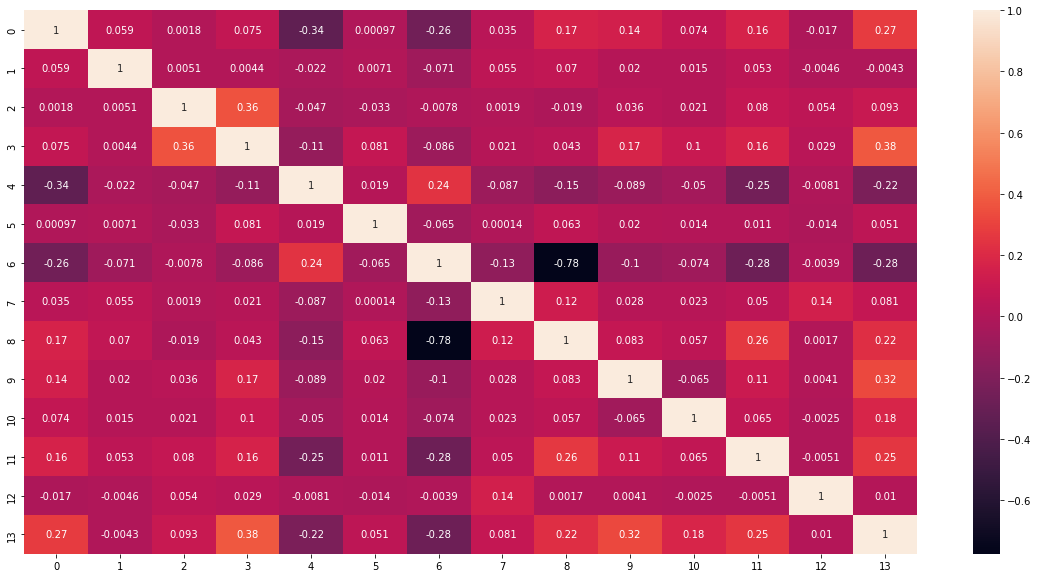

In [327]:
plt.figure(figsize=(20,10))
sns.heatmap(encode_df.corr(),annot=True)
print('Sesudah di Encode')

setelah di encode, terlihat bahwa 6 (relationship) dengan 1(workclass) berpengaruh. karena seperti yang saya asumsikan sebelumnya, bahwa banyak laki-laki yang menikah yang bekerja. 

# Data Preprocessing

In [328]:
X = encode_df.drop([3, 7, 9, 10, 12, 13], axis=1)
y = encode_df[13]

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=150)

In [330]:
X_train.isnull().sum()

0     0
1     0
2     0
4     0
5     0
6     0
8     0
11    0
dtype: int64

In [331]:
X_test.isnull().sum()

0     0
1     0
2     0
4     0
5     0
6     0
8     0
11    0
dtype: int64

In [332]:
y_train.isnull().sum()

0

In [333]:
y_test.isnull().sum()

0

In [334]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Model Definition

In [335]:
log_model = LogisticRegression()

In [336]:
log_model.fit(X_train_scaler, y_train)

LogisticRegression()

# Model Training & Model Evaluation

In [337]:
y_train_pred = log_model.predict(X_train_scaler)
y_test_pred = log_model.predict(X_test_scaler)

In [338]:
print('Accuracy Score Train : ', accuracy_score(y_train,y_train_pred))
print('Accuracy Score Test : ',accuracy_score(y_test,y_test_pred))

Accuracy Score Train :  0.719143361622145
Accuracy Score Test :  0.7107061503416856


ini berarti bahwa akurasi pada model ini adalah 0.71 atau 71% (tingkat kesalahannya 0.29 atau 29%). 

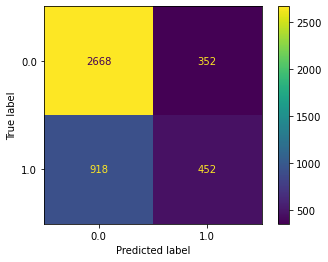

In [339]:
cm = confusion_matrix(y_test, y_test_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

berdasarkan tabel ini, prediksi yang benar sebanyak 2668 dan prediksi yang salah sebanyak 918. sedangkan prediksi benar tetapi terdeteksi salah sebanyak 352 dan prediksi salah tetapi terdeteksi benar sebanyak 452

In [340]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81      3020
         1.0       0.56      0.33      0.42      1370

    accuracy                           0.71      4390
   macro avg       0.65      0.61      0.61      4390
weighted avg       0.69      0.71      0.69      4390



berdasarkan hal ini, best value pada model ini adalah 0.42 dan worst valuenya adalah 0.81. berdasarkan hasil percision dan recall tersebut, berarti label ini memang benar termasuk dalam klasifikasi karena nilai precision dan recall menjauhi 0.

In [341]:
clf = svm.SVC(kernel='linear')

In [342]:
clf.fit(X_train_scaler,y_train)

SVC(kernel='linear')

In [343]:
pred_ytrain = clf.predict(X_train_scaler)
pred_ytest = clf.predict(X_test_scaler)

In [344]:
print('Accuracy Score Train : ',accuracy_score(y_train, pred_ytrain))
print('Accuracy Score Test : ',accuracy_score(y_test,pred_ytest))

Accuracy Score Train :  0.6923734123141767
Accuracy Score Test :  0.6879271070615034


ini berarti bahwa akurasi pada model ini adalah 0.69 atau 69% (tingkat kesalahannya 0.31 atau 31%). 

In [345]:
print(classification_report(y_test, pred_ytest))

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      3020
         1.0       0.00      0.00      0.00      1370

    accuracy                           0.69      4390
   macro avg       0.34      0.50      0.41      4390
weighted avg       0.47      0.69      0.56      4390



c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


berdasarkan hal ini, best value pada model ini adalah 0.00 dan worst valuenya adalah 0.82. berdasarkan hasil percision tersebut, berarti label ini gagal termasuk dalam klasifikasi karena nilai precision mendekati 0. sedengkan nilai recall tersebut, berarti label ini memang benar termasuk dalam klasifikasi karena nilai precision dan recall menjauhi 0

# Model Inference

In [346]:
df_inf_encode = encode.transform(df_inf)

In [347]:
df_inf_df = pd.DataFrame(df_inf_encode)

In [348]:
dfinf = df_inf_df.drop([3, 7, 9, 10, 12, 13], axis=1)

In [349]:
df_inf_scaler = scaler.transform(dfinf)

In [350]:
df_inf_pred = log_model.predict(df_inf_scaler)
print('Model Predict is : ',df_inf_pred)

Model Predict is :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [351]:
# membuat dataframe
dfinf_scaled_final = pd.DataFrame(df_inf_scaler)
dfinf_pred_final = pd.DataFrame(df_inf_pred, columns=['prediksi'])

In [352]:
# menggabungkan dataframe
dfinf_real = pd.concat([dfinf_scaled_final,dfinf_pred_final], axis=1)

In [353]:
dfinf = pd.concat([(df_inf['income_bracket']), (df_inf_df[13]), (dfinf_real['prediksi'])], axis=1)
dfinf

,income_bracket,13,prediksi
0,<=50K,0.0,0.0
1,>50K,1.0,0.0
2,<=50K,0.0,0.0
3,>50K,1.0,0.0
4,>50K,1.0,0.0
5,<=50K,0.0,0.0
6,<=50K,0.0,0.0
7,<=50K,0.0,0.0
8,>50K,1.0,1.0
9,>50K,1.0,1.0


0 : <=50k (benar)

1 : >50K (salah)

---

berdasarkan hasil prediksi yang telah dibuat, dengan hasil tersebut terlihat bahwa model yang dibuat telah dapat memprediksi dengan akuransi yang cukup baik. berdasarkan sample dari 20 sample hanya 3 sample yang salah. sehingga menjadikan bahwa model tersebut dapat memprediksi dengan cukup baik.

# Kesimpulan

saya mendrop education_num, race, capital_gain, capital_loss, native_country karena menurut saya hal tersebut tidak berpengaruh seseorang dalam hal pendapatan pribadi. capital_gain dan capital_loss berpengaruh terhadap negara dan native_country orang tersebut, sedangkan race, bagi saya tidak berpengaruh dalam hal pendapatan karena menjadikannya 'RASISME'.


----
dari hasil model prediksi yang telah dibuat, dapat disimpulkan bahwa model logistic regression lebih baik dalam memprediksi daripada model prediksi SVM. dengan tingkat ke akuratan model Logistic sebesar 71% sedangkan model SVM sebesar 69%.


----
berdasarkan hasil prediksi yang telah dibuat, dengan hasil tersebut terlihat bahwa model yang dibuat telah dapat memprediksi dengan akuransi yang cukup baik. berdasarkan sample dari 20 sample hanya 3 sample yang salah. sehingga menjadikan bahwa model tersebut dapat memprediksi dengan cukup baik.